In [74]:
from skimage import morphology as skmo
from skimage import io as skio
from skimage.filters import threshold_mean
import numpy as np
from matplotlib import pyplot as plt

In [75]:
image = skio.imread('thumbnail.jpeg', as_grey=True)

In [76]:
thresh = threshold_mean(image)
binary = image > thresh

In [77]:
np.shape(binary)

(300, 300)

In [144]:
def skeletonize(img, mask):
    skeleton_set = []
    while True:
        erosion = skmo.erosion(img, mask)
        if np.sum(erosion) == 0:
            skeleton_set.append(img)
            break
        dilation = skmo.dilation(erosion, mask)
        skeleton_set.append(img ^ (img & dilation))
        img = erosion
    result = skeleton_set[0]
    for skeleton in skeleton_set[1:]:
        result |= skeleton
    return (result, skeleton_set)

In [145]:
def reconstruct(skeleton_set, mask):
    result = skeleton_set[-1]
    for skeleton in skeleton_set[-2::-1]:
        result = skmo.dilation(result, mask)
        result |= skeleton
    return result

In [149]:
def task(binary, mask):
    fig, axes = plt.subplots(ncols=4, figsize=(18, 3))
    ax = axes.ravel()

    titles = ['Original', 'Skelet', 'Reconstruct', 'Sub']
    
    ax[0].imshow(binary, cmap=plt.cm.gray)
    
    skelet, skeleton_set = skeletonize(binary, mask)
    ax[1].imshow(skelet, cmap=plt.cm.gray)
    
    reconstruct_img = reconstruct(skeleton_set, mask)
    ax[2].imshow(reconstruct_img, cmap=plt.cm.gray)
    
    ax[3].imshow(binary ^ reconstruct_img, cmap=plt.cm.gray)

    for a, title in zip(ax, titles):
        a.set_title(title)
        a.axis('off')

    plt.show()

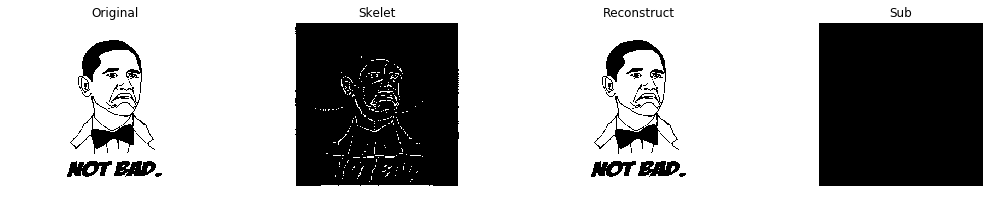

In [150]:
task(binary, np.ones((3, 3)))

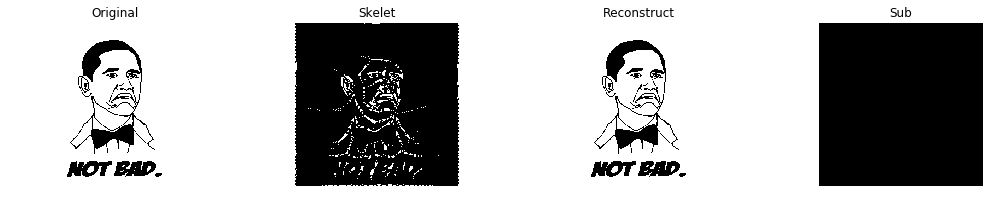

In [151]:
task(binary, skmo.disk(3))

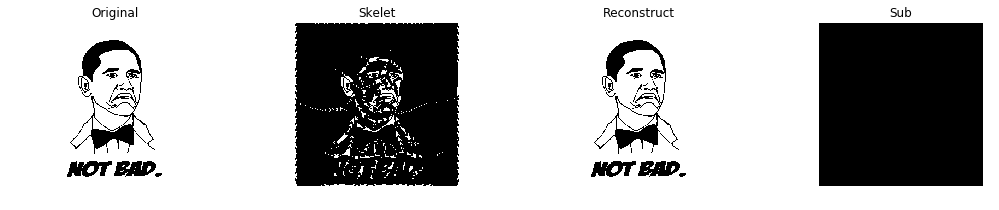

In [152]:
task(binary, skmo.star(3))

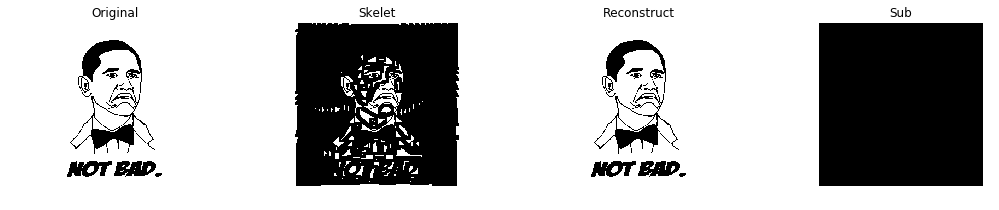

In [154]:
task(binary, np.ones((11, 11)))

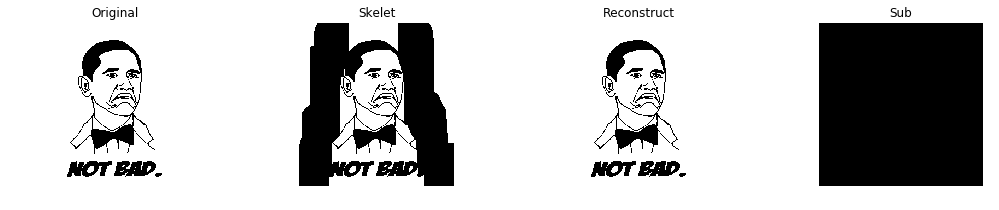

In [155]:
task(binary, np.ones((111, 111)))